### 1.1. Problem Statement

The Iris dataset is a classic multivariate dataset introduced by British biologist and statistician Ronald Fisher. It consists of measurements of iris flowers from three different species. The goal of this EDA is to explore and understand the patterns, relationships, and distinguishing features among these species based on their morphological measurements.

We aim to analyze this dataset to gain insights into how various flower features differ among species and how well these features can be used to classify iris flowers.

---

### 1.2. Objective of the Analysis

The key objectives of this EDA process are:

- To **understand the structure** and **basic statistics** of the dataset.
- To **visualize relationships** among numerical features (like sepal and petal length/width).
- To **identify patterns or clusters** based on species.
- To **detect any anomalies or outliers**.
- To **evaluate feature importance** and separability for classification tasks.

This analysis will lay the foundation for building a classification model using the iris dataset.

---

### 1.3. Dataset Description

The **Iris dataset** consists of **150 observations** with **5 attributes**, and is readily available via the **Seaborn library** in Python.

| Column Name     | Description                                  | Data Type  |
|----------------|----------------------------------------------|------------|
| `sepal_length` | Length of the sepal (in centimeters)         | Float      |
| `sepal_width`  | Width of the sepal (in centimeters)          | Float      |
| `petal_length` | Length of the petal (in centimeters)         | Float      |
| `petal_width`  | Width of the petal (in centimeters)          | Float      |
| `species`      | Species of the Iris flower (`setosa`, `versicolor`, `virginica`) | Categorical |

Each of the three species has 50 samples, making the dataset balanced. The features are continuous and measured in centimeters.

### 2. Data Loading and Setup

In [1]:
## 2.1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')
plt.style.use('ggplot')


In [2]:
# 2. Load the Dataset
df = sns.load_dataset('iris')

# Quick look
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# A function for stylish view
def print_section(title):
    print("\n" + "=" * len(title))
    print(title)
    print("=" * len(title) + "\n")

### 3. Understand the Dataset Structure

In [5]:
## 3.1. Display Basic Information
print_section('Shape of the dataset')
print("Shape:", df.shape)
print_section('Basic info:')
df.info()


Shape of the dataset

Shape: (150, 5)

Basic info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# 3.2. Summary Statistics
# Numerical columns
print_section('Statistics of Numerical columns')
print(df.describe())

# Categorical columns
print_section('Statistics of Categorical columns')
print(df.describe(include='object'))

print_section('Number of unique values in features:')
print(df.nunique())


Statistics of Numerical columns

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Statistics of Categorical columns

       species
count      150
unique       3
top     setosa
freq        50

Number of unique values in features:

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64


### 4. Target Variable Analysis


Class distribution on counts:

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Class distribution on percentage:

species
setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: proportion, dtype: float64


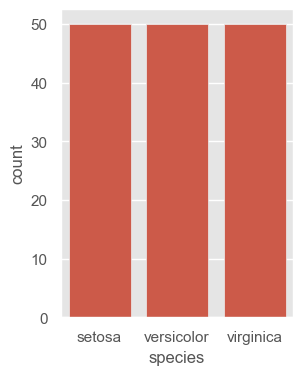

In [12]:
# Check class distribution (counts and proportions) to assess balance
print_section('Class distribution on counts:')
print(df['species'].value_counts())
print_section('Class distribution on percentage:')
print(df['species'].value_counts(normalize=True)*100)

# Graphical representation
fig = plt.figure(figsize=(3,4))
sns.countplot(data=df, x='species')
plt.show()

### 5. Data Cleaning

In [14]:
## 5.1. Handling Missing Values
print(df.isnull().sum())

# Comment: No Missing value found.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [15]:
## 5.2. Handling Duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 1


In [18]:
# Duplicate records
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [22]:
## Remove the duplicates
df.drop_duplicates(inplace=True)

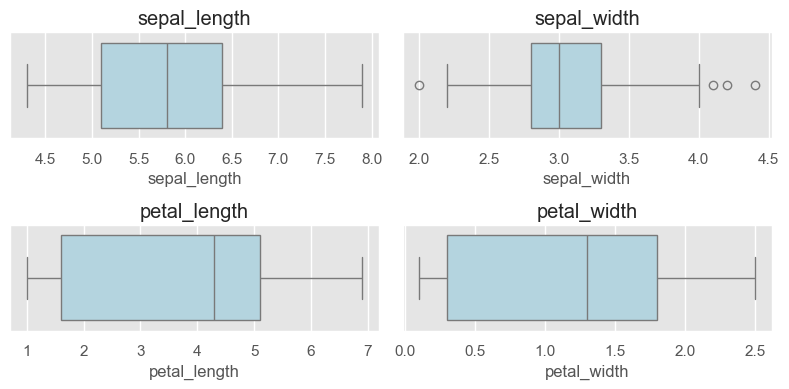

In [46]:
## 5.3. Handling Outliers of Continuous Features

# numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['car_ID'])
plt.figure(figsize=(8,4))
for i, col in enumerate(df.columns[0:4]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

### 6. Univariate Analysis (Single Variable)

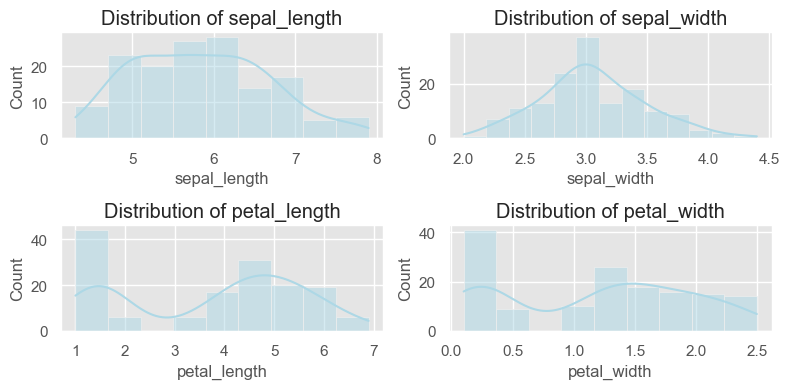

In [50]:
## 6.1. Numerical Variables

plt.figure(figsize=(8,4))
for i, col in enumerate(df.columns[0:4]): # (numeric_df.columns):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[col], kde = True, color='lightblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


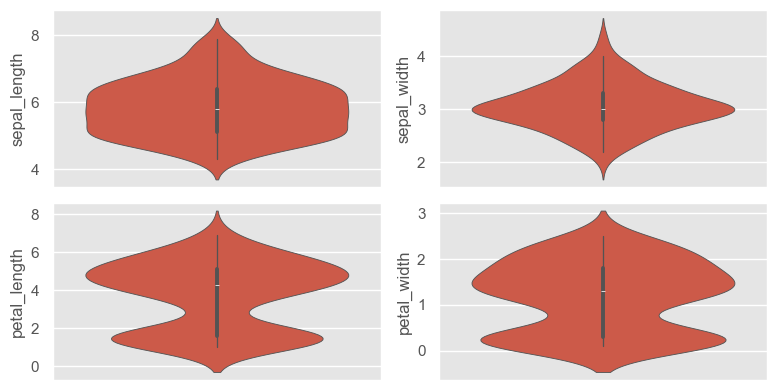

In [40]:
# Distribution and density
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,4))
sns.violinplot(data=df, y='sepal_length', ax=ax[0,0])
sns.violinplot(data=df, y='sepal_width', ax=ax[0,1])
sns.violinplot(data=df, y='petal_length', ax=ax[1,0])
sns.violinplot(data=df, y='petal_width', ax=ax[1,1])
plt.tight_layout()
plt.show()

### 7. Bivariate and Multivariate Analysis

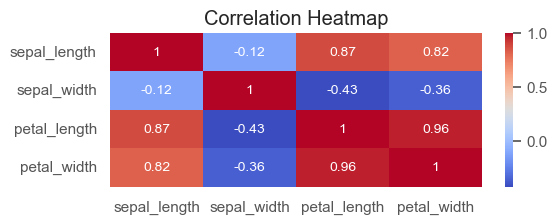

In [52]:
# Heatmap of correlations
plt.figure(figsize=(6, 2))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

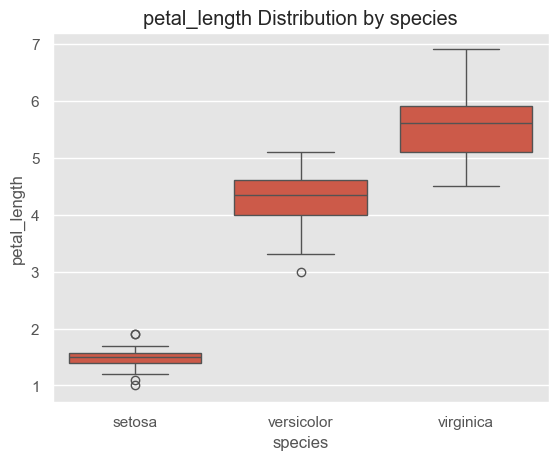

In [27]:
# Species vs Petal_length
sns.boxplot(data=df, x='species', y='petal_length')
plt.title("petal_length Distribution by species")
plt.show()

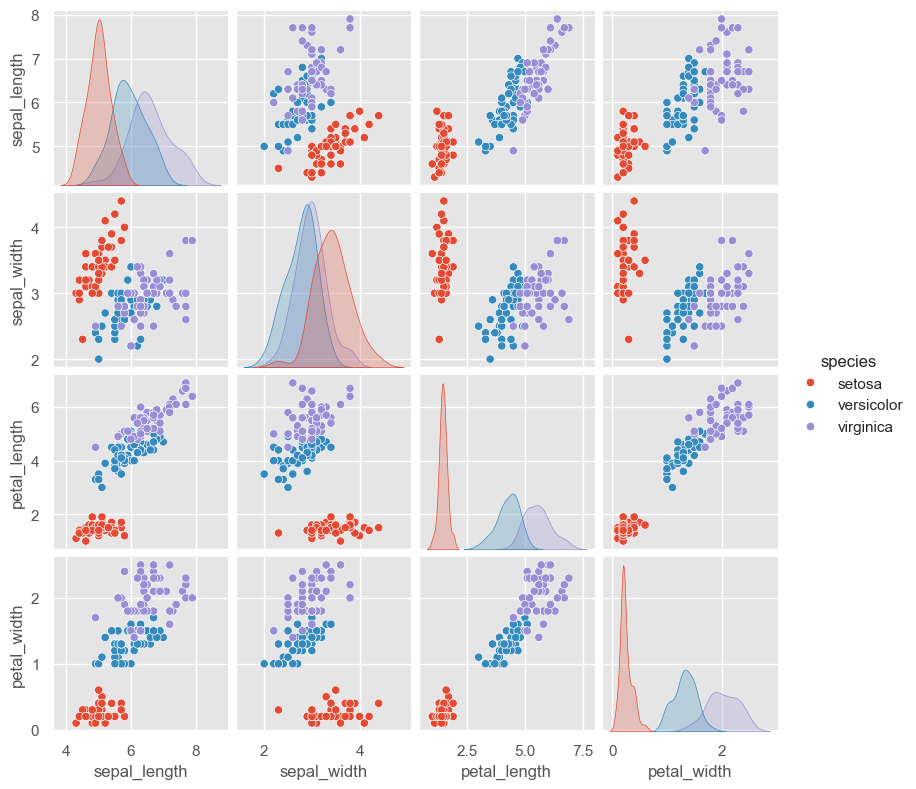

In [28]:
sns.pairplot(data=df, hue='species', height=2)
plt.show()

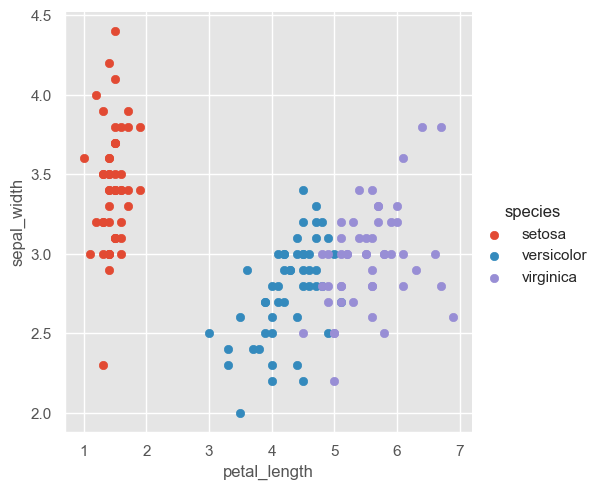

In [29]:
sns.FacetGrid(df,hue="species",height=5).map(plt.scatter,"petal_length","sepal_width").add_legend();
plt.show()

### 7. Feature Engineering

In [31]:
# Create new feature: petal_ratio
df['petal_ratio'] = df['petal_length'] / df['petal_width']
df.insert(4, 'petal_ratio', df.pop('petal_ratio'))

# Encode categorical: sex
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

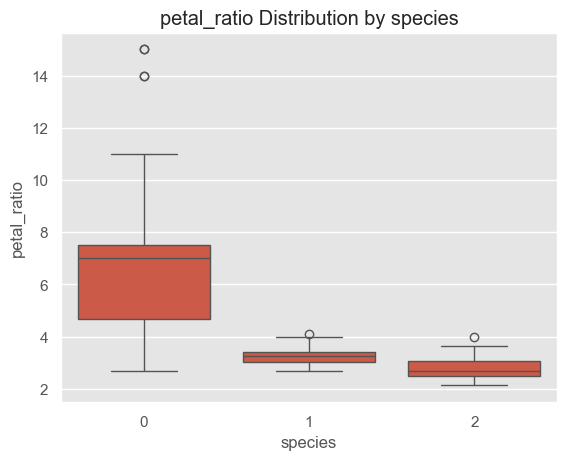

In [32]:
# Species vs petal_ratio
sns.boxplot(data=df, x='species', y='petal_ratio')
plt.title("petal_ratio Distribution by species")
plt.show()

### 9. Statistical Summary & Insights

In [57]:
# 9. Final Cleaned Dataset Overview

print_section("9. Final Cleaned Dataset Overview")
print(df.head())
print_section("Basic info about the Dataset")
print(df.info())
print_section("Description of the Numerical Data")
print(df.describe())


9. Final Cleaned Dataset Overview

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Basic info about the Dataset

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None

Description of the Numerical Data

       sepal_length  sepal_width  petal_length  petal_wi